In [871]:
import seaborn as sns
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [872]:
# initialize
m = 4
w = 5

signals = [f"Signal_{i+1}" for i in range(m)]
timesteps = [f"Time_step_{i+1}" for i in range(w)]

recon_loss = pd.DataFrame(np.abs(np.random.randn(w, m)))
recon_loss.columns = signals
recon_loss.index = timesteps
recon_loss

,Signal_1,Signal_2,Signal_3,Signal_4
Time_step_1,0.732231,0.476920,0.750775,1.666248
Time_step_2,0.855685,1.401992,1.642261,0.740857
Time_step_3,0.391607,0.073128,0.163314,1.191190
Time_step_4,0.784481,0.831641,0.230015,0.643491
Time_step_5,0.760091,0.801878,0.312210,2.094339


In [873]:
r_loss = pd.DataFrame(np.abs(np.random.randn(1, m)), columns = signals)+0.85
r_time = pd.DataFrame(np.abs(np.random.randn(1, m)), columns = signals)+0.1
r_signal = pd.DataFrame(np.abs(np.random.randn(1, 1)))
r_loss, r_time, r_signal
r_signal

,0
0,0.971583


In [874]:
r_loss_mat = pd.DataFrame(r_loss.values.tolist()*w, columns = signals, index=timesteps)
r_time_mat = pd.DataFrame(r_time.values.tolist()*w, columns = signals, index=timesteps)
r_time_mat

,Signal_1,Signal_2,Signal_3,Signal_4
Time_step_1,0.537051,0.639365,0.747208,0.341585
Time_step_2,0.537051,0.639365,0.747208,0.341585
Time_step_3,0.537051,0.639365,0.747208,0.341585
Time_step_4,0.537051,0.639365,0.747208,0.341585
Time_step_5,0.537051,0.639365,0.747208,0.341585


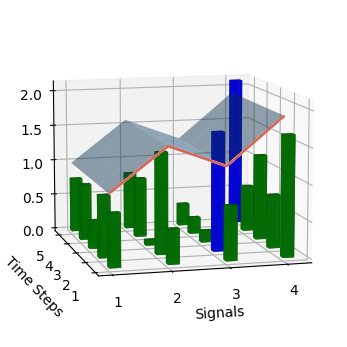

In [875]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm


# setup the figure and axes
fig = plt.figure(figsize=(7, 5))
ax = fig.add_subplot(121, projection='3d')

# Grid data...10

x = np.arange(1,w+1,1)
y = np.arange(1,m+1,1)
# X, Y = np.meshgrid(x + 0.25, y - 0.10)
X, Y = np.meshgrid(x, y)

# Data for 3D plot
top = recon_loss.T.values.flatten()

# ---- others ---
x_bar, y_bar = X.flatten(), Y.flatten()
bottom = np.zeros_like(top)
width = depth = 0.20

# 3D Barplot
colors = recon_loss.astype(str)
red_pos = recon_loss.values > r_loss_mat.values
green_pos = recon_loss.values <= r_loss_mat.values

colors[green_pos] = 'green' 
colors[red_pos] = 'blue' 
colors = colors.T.values.flatten().tolist()

# -------- done---------------------
ax.bar3d(y_bar, x_bar, bottom, width, depth, top, shade=True, alpha = 0.85, color = colors) #, color = ['orange'', 'green']*50)
ax.set_xlabel('Signals')
ax.set_ylabel('Time Steps')
#--------------------------------------


x = np.arange(1,w+1,1)
y = np.arange(1,m+1,1)
# X, Y = np.meshgrid(x + 0.25, y + 0.50)
X, Y = np.meshgrid(x, y)
wrap = r_loss_mat.values
# Surface plot
surf = ax.plot_surface(Y, X, wrap.T, alpha=0.45,
                       linewidth=1.50, antialiased=True)

# ax.contour(Y, X, wrap.T, zdir='z', offset=0, cmap=cm.viridis)
# ax.contour(Y, X, wrap.T, zdir='x', offset=-10, cmap='coolwarm')
ax.contour(Y, X, wrap.T, zdir='y', offset = 1, cmap='coolwarm')

# Contour plot
# ax.contour(X, Y, Z, extend3d=True, cmap=cm.coolwarm)


ax.view_init(10, 255)

plt.tight_layout()
plt.show()

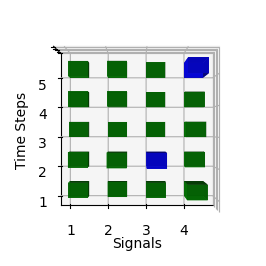

In [876]:
width = depth = 0.50
# setup the figure and axes
fig = plt.figure(figsize=(7, 5))
ax = fig.add_subplot(121, projection='3d')
# -------- done---------------------
ax.bar3d(y_bar, x_bar, bottom, width, depth, top, shade=True, alpha = 0.85, color = colors) #, color = ['orange'', 'green']*50)
ax.set_xlabel('Signals')
ax.set_ylabel('Time Steps')
#--------------------------------------
ax.zaxis.set_ticklabels([])

ax.view_init(90, 270)
plt.show()


In [877]:
time_vio = pd.DataFrame((recon_loss > r_loss_mat).astype(int).sum()/w).T
# time_vio.columns = [f"{i+1}" for i in range(m)]

In [878]:
colors = pd.Series(['blue'] * m, dtype=str).astype(str) 

red_pos = time_vio.values.flatten() > r_time.values.flatten()
green_pos = time_vio.values.flatten() == 0

colors[red_pos] = 'orange'
colors[green_pos] = 'green'
colors = colors.values.tolist()
colors


['green', 'green', 'blue', 'blue']

(array([0, 1, 2, 3]),
 [Text(0, 0, 'Signal_1'),
  Text(1, 0, 'Signal_2'),
  Text(2, 0, 'Signal_3'),
  Text(3, 0, 'Signal_4')])

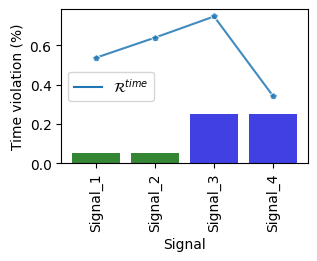

In [879]:
fig = plt.figure(figsize=(7, 2))
ax = fig.add_subplot(121)
sns.barplot(data = time_vio + 0.05, palette = colors, alpha = 0.85, ax = ax)
ax.set_xlabel("Signal")
ax.set_ylabel("Time violation (%)")
# ax.set_xticks()

# ax1 = ax.twinx()
data = r_time.T
data.columns = ['$\mathcal{R}^{time}$']
sns.lineplot(data = data, color = 'orange', alpha = 0.85, marker = 'p', ax = ax)
# ax1.set_xticks(signals, rotation = 90)

plt.xticks(rotation = 90)

In [880]:
signal_vio = pd.DataFrame(pd.Series(colors).value_counts()/w)
signal_vio = signal_vio.sort_index()
# signal_vio.columns 

try:
    signal_vio.loc['orange']
except:
    signal_vio.loc['orange'] = 0.02

signal_vio


,0
blue,0.40
green,0.40
orange,0.02


In [881]:
dict_rename = {'green' : 'No violation', 'blue' : 'Loss only', 'orange' : 'Time step'}
signal_vio = signal_vio.rename(index=dict_rename)
signal_vio

,0
Loss only,0.40
No violation,0.40
Time step,0.02


In [882]:
# signal_vio.index = ['No violation', 'Loss only', 'Time step']
signal_vio.columns = ['Types of Violation']
signal_vio

,Types of Violation
Loss only,0.40
No violation,0.40
Time step,0.02


In [883]:
signal_vio.sort_index()

,Types of Violation
Loss only,0.40
No violation,0.40
Time step,0.02


In [884]:
r_signal_th = 0.10 #r_signal.values[0][0]

In [885]:
r_signal_df = pd.DataFrame([[np.nan, np.nan, r_signal_th]])
r_signal_df.columns = ['No violation', 'Loss only', 'Time step']
# r_signal.index = ['Time step']
# r_signal[['No violation', 'Loss only']] = np.nan
r_signal_df = r_signal_df.T.sort_index().T
r_signal_df

,Loss only,No violation,Time step
0,NaN,NaN,0.1


In [886]:
palette = ['blue', 'green', 'orange']
palette[-1] = 'red' if signal_vio.loc['Time step'].values[0] > r_signal_th else 'orange'
palette

['blue', 'green', 'orange']

Text(0, 0.5, 'Percentage of Signals (%)')

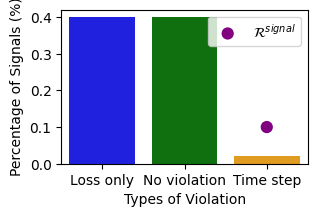

In [887]:
#-------
fig = plt.figure(figsize=(7, 2))
ax = fig.add_subplot(121)

sns.barplot(data = signal_vio.T, palette = palette, ax = ax)
sns.pointplot(data=r_signal_df, join=False, color='purple', label= '$\mathcal{R}^{signal}$', ax=ax) #, zorder=1)
plt.legend()
ax.set_xlabel("Types of Violation")
ax.set_ylabel("Percentage of Signals (%)")